# Watchlist and (MOC) Area hits
### Ken Smith
This code gets a previously defined area on the sky with [MOC](https://cds-astro.github.io/mocpy/) (multi-order coverage maps), an [IVOA standard](https://ivoa.net/documents/MOC/) and grabs the ZTF objects that lie within that area that are also in a watchlist.  The code is in development, but for more information on converting (e.g.) Healpix maps of GW events to MOCs, feel free to get in touch.

We have defined the SDSS footprint within Lasair as https://lasair-ztf.lsst.ac.uk/area/2/ (area number 2).  The area number is needed for the SQL query later on.  Likewise, we also have a predefined watchlist of BLLacs https://lasair-ztf.lsst.ac.uk/watchlist/35/ (number 35).  In the current implementation, the watchlist number is also required later.

Demonstrates usage of:
* Area Hits
* Watchlist Hits
* /query/
* /objects/

This code demonstrates a query that can check a watchlist for ZTF hits that also overlap a previously defined area of the sky - e.g. GW 90% contour or SDSS area.  See https://lasair-ztf.lsst.ac.uk/area/ and https://lasair-ztf.lsst.ac.uk/watchlist/.

### Python (3 only) requirements - pip install
lasair, requests

In [ ]:
!pip install lasair

### Grab my Lasair API token
Get your token before you start.  If you haven't got a Lasair account you can register here: https://lasair-ztf.lsst.ac.uk/signup.  Use the curl command below to get your token & set the last line of the next cell to be your token ID.

```bash
curl --data "username=myusername&password=***********" https://lasair-ztf.lsst.ac.uk/api/auth-token/
```
You should get the following response:
```json
{"token":"4b762569bb349bd8d60f1bc7da3f39dbfaefff9a"}
```
We can use this token temporarily, but note that this test token will only allow a very small number of requests per hour!  Hence it may be disabled when you come to test this code.

In [ ]:
from astropy.time import Time
import matplotlib.pyplot as plt

from lasair import LasairError, lasair_client as lasair

token = "4b762569bb349bd8d60f1bc7da3f39dbfaefff9a"

### Make an SQL query
Note that the database is not very old - a few months.  (It's very much a prototype system, which may be destroyed and rebuilt at a moment's notice.)  Hence there will be no data older than 2021 in this system.

In [ ]:
selected = """
objects.objectId,
objects.ramean,
objects.decmean,
objects.jdmin - 2400000.5 AS mjdmin,
objects.jdmax - 2400000.5 AS mjdmax,
objects.magrmin,
objects.rmag,
sherlock_classifications.classification,
IF(objects.distpsnr1 < 2 AND objects.sgscore1 > 0.49, "PS1_star", "Not_PS1_star") score
"""

# watchlist 35 = BLLac AGNS and areas 2 = SDSS
tables = 'objects,sherlock_classifications,watchlists:35,areas:2'

# Lasair will attempt to join the tables internally without the need to specify
# explicit join conditions, unless you wish to restrict the results further.
# Hence conditions here are blank!
conditions = """
"""


L = lasair(token, endpoint = "https://lasair-ztf.lsst.ac.uk/api")
try:
    results = L.query(selected, tables, conditions, limit = 100)
except LasairError as e:
    print(e)


In [ ]:
# Did we get anything - just crudely print out the results if so.
for row in results:
    try:
        print(row['objectId'],
              "%.5f" % row['ramean'],
              "%.5f" % row['decmean'],
              "%.5f" % row['mjdmin'],
              "%.5f" % row['mjdmax'],
              "%.2f" % row['magrmin'],
              "%.2f" % row['rmag'],
              row['classification'],
              row['score'])
    except:
        print(row['objectId'],
              row['ramean'],
              row['decmean'],
              row['mjdmin'],
              row['mjdmax'],
              row['magrmin'],
              row['rmag'],
              row['classification'],
              row['score'])

ZTF17aaapqiz 185.38203 28.23289 59265.37212 59275.38517 15.38 15.63 AGN PS1_star
ZTF18aabxehk 184.46693 30.11683 59290.32591 59317.19690 16.37 16.65 AGN PS1_star
ZTF18aacapwh 185.34141 30.17698 59290.35253 59317.20594 17.19 17.19 AGN PS1_star
ZTF18aajmxtj 153.76718 49.43352 59290.31051 59316.28644 17.16 17.25 AGN PS1_star
ZTF18aamndyk 253.46759 39.76014 59292.45027 59315.44730 15.69 15.69 AGN Not_PS1_star
ZTF18aaquoaj 217.13595 42.67254 59291.49674 59297.41230 19.31 19.31 AGN Not_PS1_star
ZTF18aaqzpsv 265.99102 19.58580 59291.51649 59313.44166 18.54 18.55 AGN Not_PS1_star
ZTF18aaylblx 238.92935 11.19006 59291.38155 59317.43639 15.13 15.17 AGN PS1_star
ZTF18aazhkrc 216.75164 23.79999 59290.39299 59317.40516 14.80 14.80 AGN PS1_star
ZTF18abalsiv 153.76718 49.43351 59290.31051 59314.26692 17.16 17.24 AGN PS1_star
ZTF18abuxvfk 57.34659 -11.99094 59248.18470 59267.15441 18.24 18.24 AGN Not_PS1_star
ZTF18acbznzg 122.45485 52.31622 59294.22003 59316.18508 17.66 17.87 AGN PS1_star
ZTF18acebdlq

### Grab the lightcurves using the objects API

ZTF17aaapqiz has no Lasair TNS info
ZTF18aabxehk has no Lasair TNS info
ZTF18aacapwh has no Lasair TNS info
AT2018chk
AT2018ctk
AT2021hba
ZTF18aaqzpsv has no Lasair TNS info
ZTF18aaylblx has no Lasair TNS info
ZTF18aazhkrc has no Lasair TNS info
AT2018chk
AT2019ttq
ZTF18acbznzg has no Lasair TNS info
ZTF18acebdlq has no Lasair TNS info
AT2019kwg
AT2019yxv
ZTF20aasczke has no Lasair TNS info
ZTF20acuaaaz has no Lasair TNS info
AT2021hba


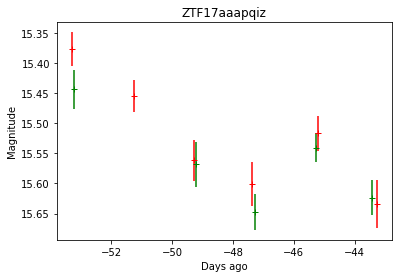

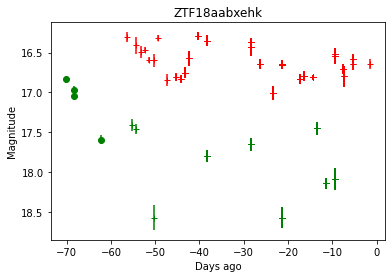

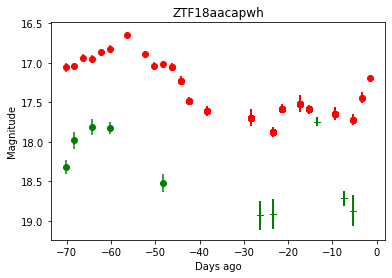

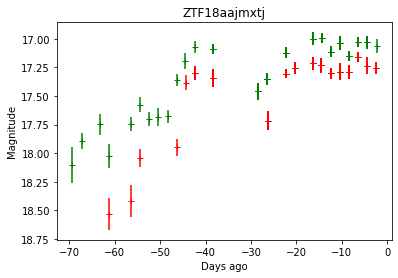

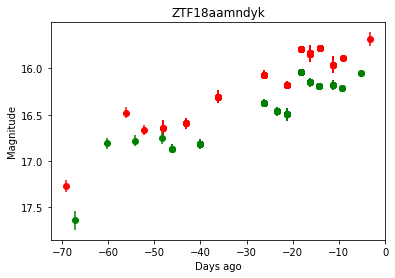

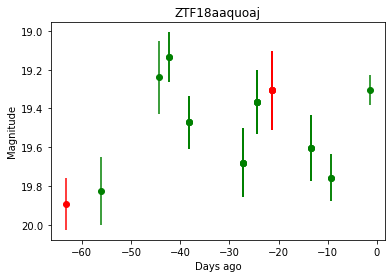

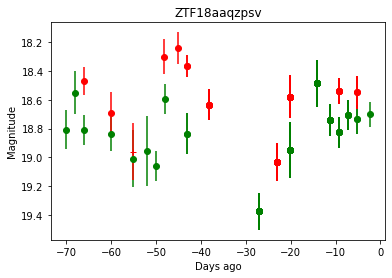

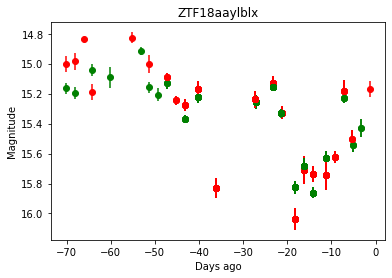

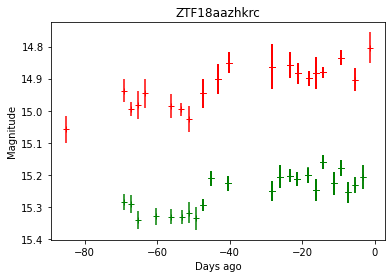

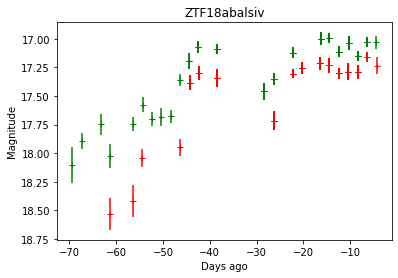

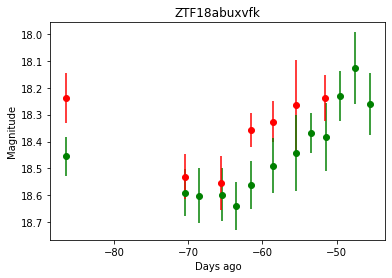

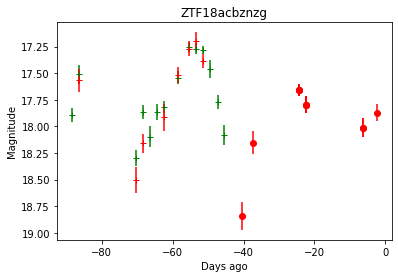

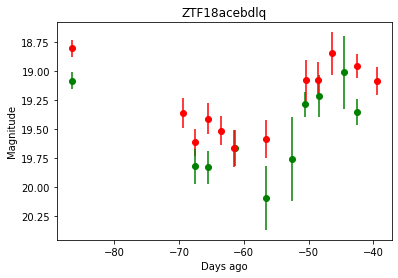

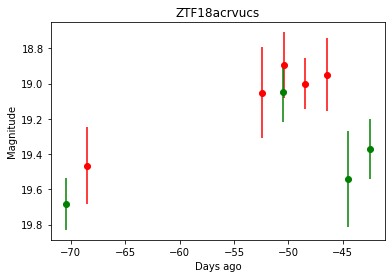

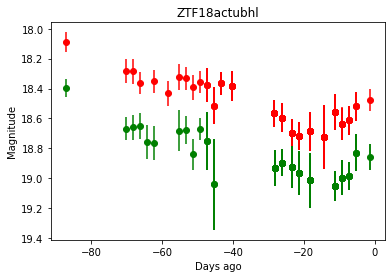

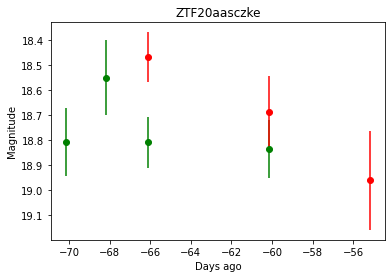

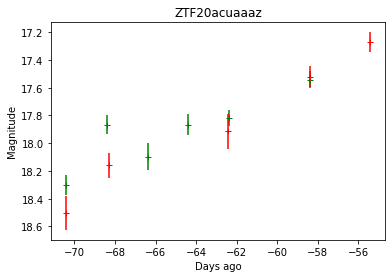

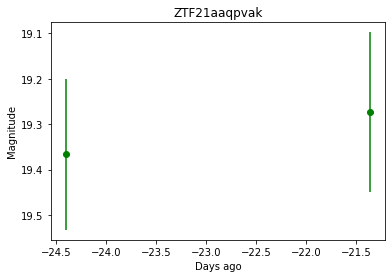

In [ ]:
objectList = [row['objectId'] for row in results]
response = L.objects(objectList)

# create an dictionary of lightcurves

lcsDict = {}
for obj in response:
    lcsDict[obj['objectId']] = {'candidates': obj['candidates']}

cols = {1:'g',2:'r',3:'k'}

now = Time.now().jd

for obj in response:
        try:
            print ("%s%s" % (obj['TNS']['tns_prefix'], obj['TNS']['tns_name']))
        except KeyError as e:
            print (obj['objectId'], "has no Lasair TNS info")
        plt.figure()
        plt.subplot(111)
        for i in lcsDict[obj['objectId']]['candidates']:
            if 'isdiffpos' in i:
                if i['isdiffpos']=='t':
                    plt.errorbar(i['jd']-now,i['magpsf'],i['sigmapsf'],fmt='o',color=cols[i['fid']])
                else:
                    plt.errorbar(i['jd']-now,i['magpsf'],i['sigmapsf'],fmt='+',color=cols[i['fid']])


        plt.gca().invert_yaxis()
        plt.ylabel('Magnitude')
        plt.xlabel('Days ago')
        plt.title(obj['objectId'])
